In [115]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import shutil
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import openpyxl
import xlsxwriter
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
import matplotlib.dates as mdates

In [116]:
from datetime import datetime
def pre_proc (predf, postdf):    
    predf.insert(0,'TEST', 'pre')
    postdf.insert(0,'TEST', 'post')
    df=pd.concat([predf, postdf],ignore_index=True)
    df[['DAY','HR']]=df[['DAY','HR']].astype(str)
    df.insert (2, 'DATE_TIME', df['DAY']+' '+df['HR']+':00' )    
    df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'])
    #df['DATE_TIME2']=df['DATE_TIME'].dt.strftime('%y%m%H')
    df.insert(3, 'WDAY', df['DATE_TIME'].dt.strftime('%a'))
    df.insert(4,'WDAY_HR', df['DATE_TIME'].dt.strftime('%a-%H'))
    df[['HR']]=df[['HR']].astype(int)
    return(df)

In [117]:
path=r"C:\Users\yakoyak\Desktop\Samsung-5G\5G NR\LS6\LS6_FOA\Westboro_MassCalling\FieldTesting_11192021\ExcelStatTables/"
cwd = os.path.abspath(path) 
files = os.listdir(path) 

In [118]:
df = pd.DataFrame()
UE_Num=1
for file in files:
    temp=pd.read_excel(path+file)  
    temp.insert(0,'UE#', str(UE_Num))
    df = df.append(temp, ignore_index=True) 
    UE_Num=UE_Num+1

In [120]:
df['SRS_Config'] = df[r'Qualcomm 5G-NR Tx Power Control Info PCell SRS Data SRS Tx Power [dBm]'].apply(lambda x: 'SRS' if x > 0 else 'PMI')
df.to_excel(path+'combo.xlsx', index = False)


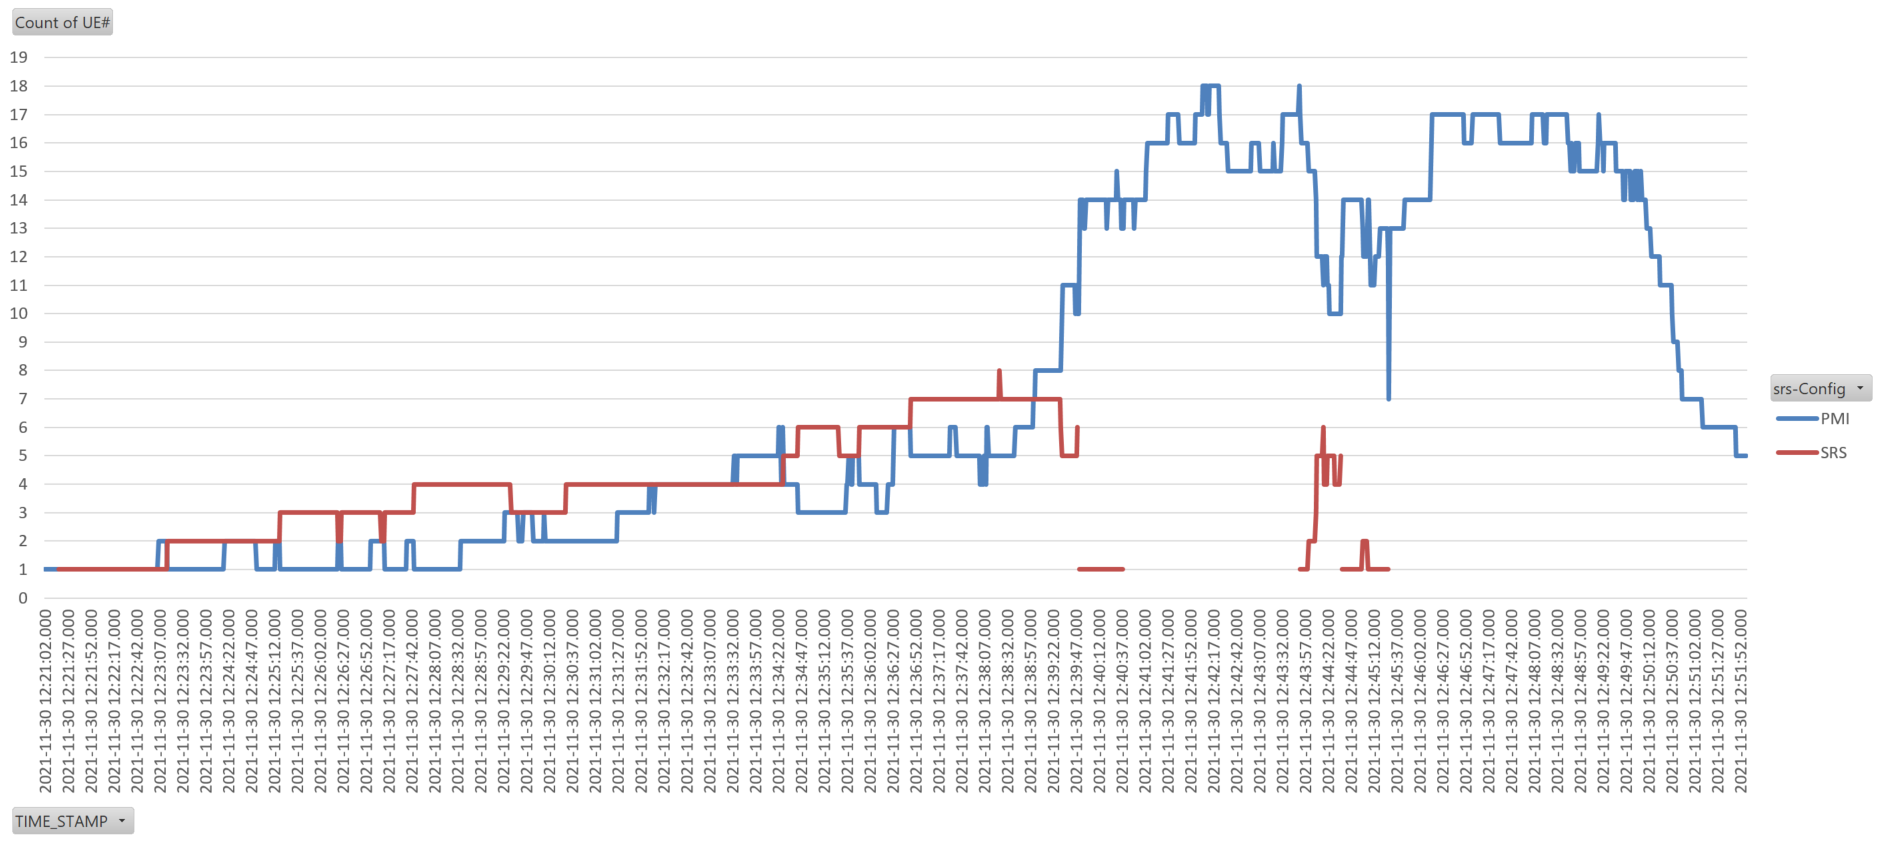

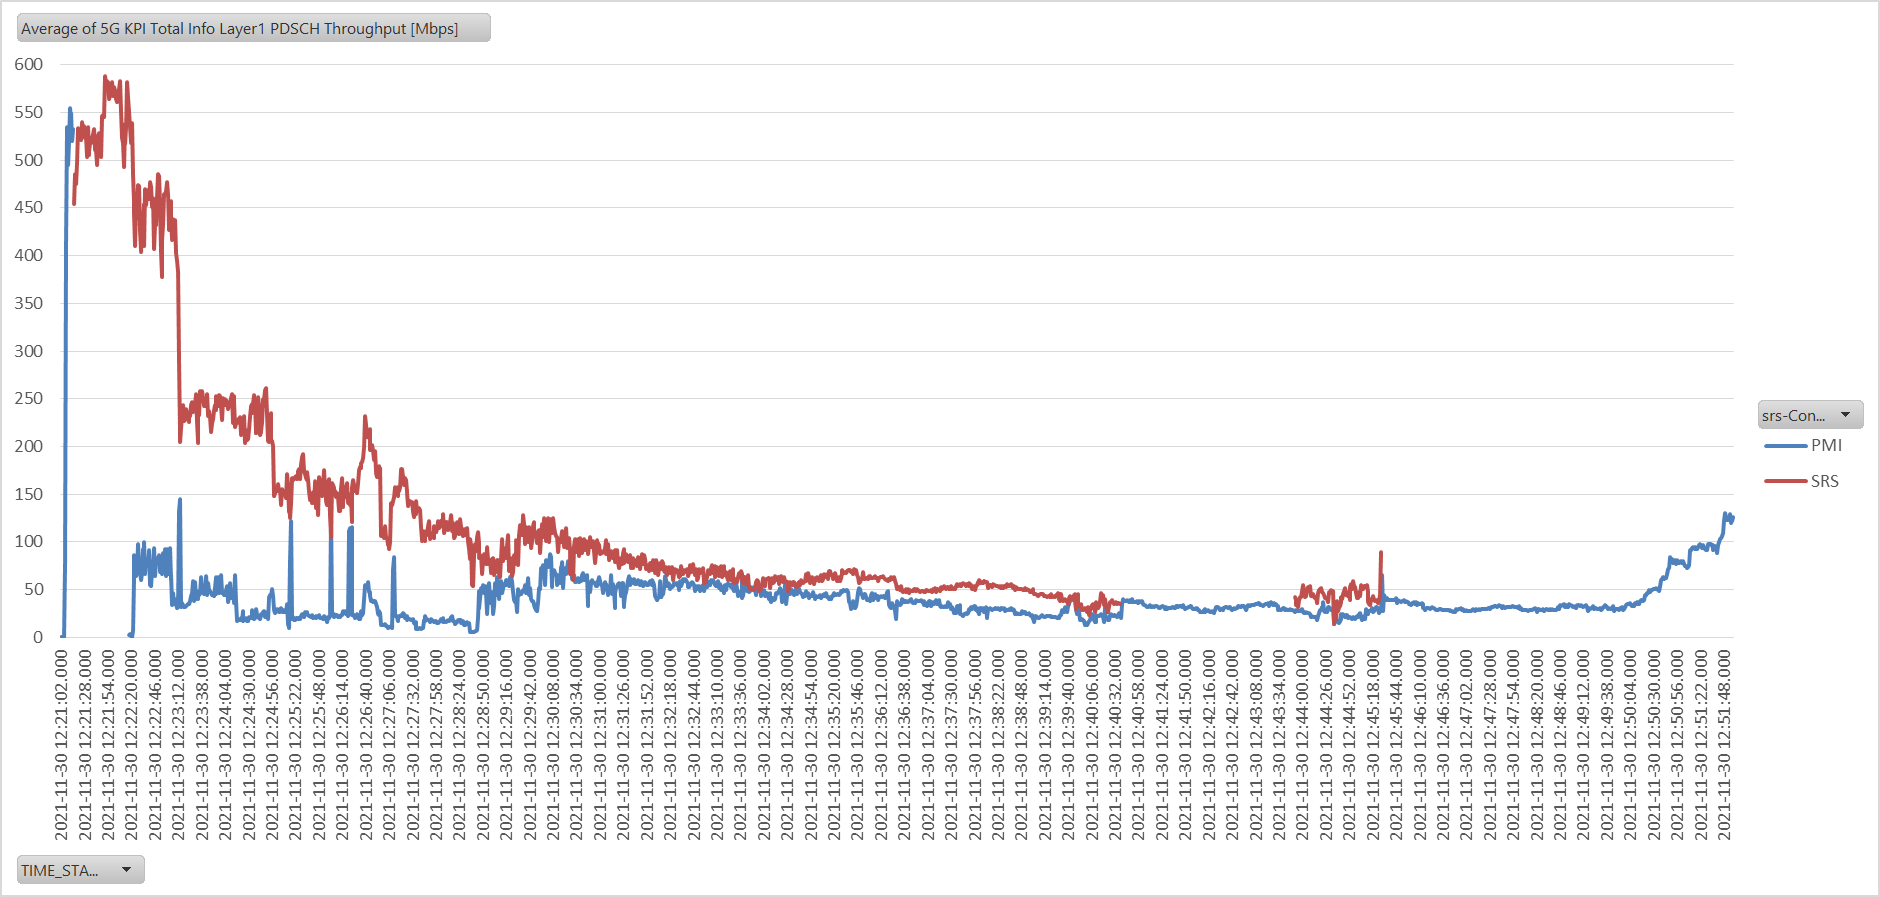

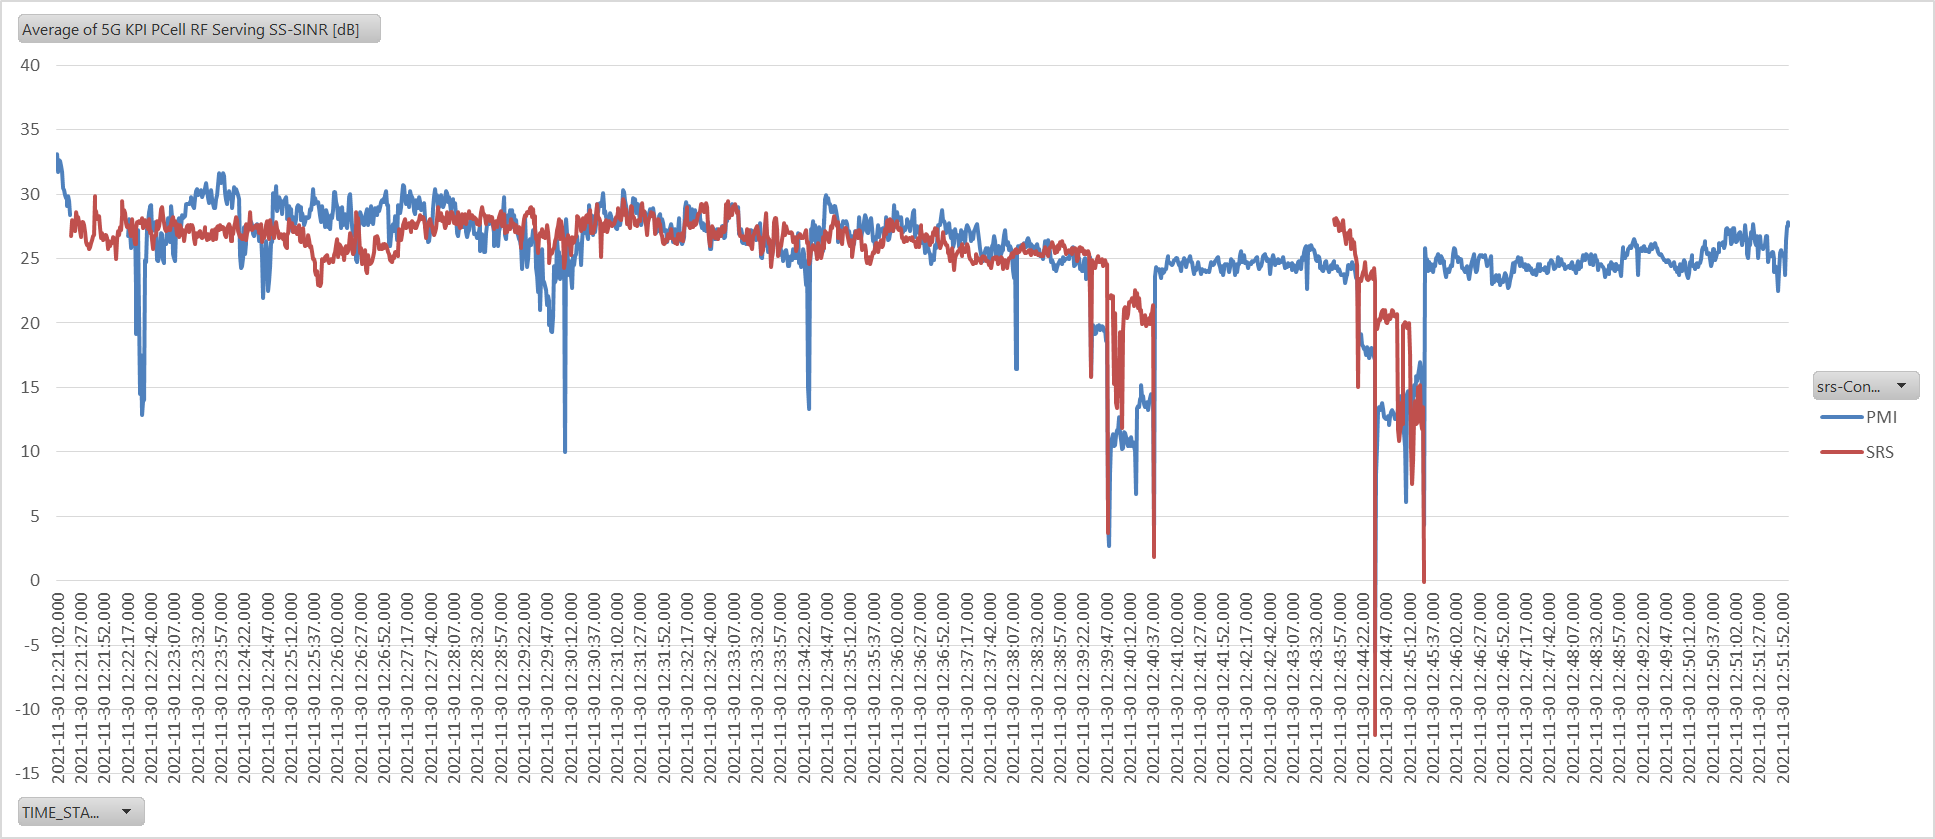